# Exercises for Chapter 7: Gradients

## 7.1 A simple introduction to gradient descent

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
### TASK

# Reproducibility
rng = np.random.default_rng(seed=1)

# Set true parameters
beta0_true, beta1_true = 1.0, 1.0

# number of observations
n = 100

# TODO: Sample x from standard normal distribution
x = np.zeros(n)

# TODO: Calculate y based on true parameters. Add noise from normal with mean 0 and standard deviation 0.2
y = np.zeros(n)

In [2]:
### SOLUTION

# Reproducibility
rng = np.random.default_rng(seed=1)

# Set true parameters of the DGP
beta0_true, beta1_true = 1.0, 1.0

# number of observations
n = 100

# Sample x from standard normal distribution
x = rng.standard_normal(n)

# Calculate y based on true parameters. Add noise from normal with mean 0 and standard deviation 0.2
y = beta0_true + beta1_true * x + rng.normal(0, 0.2, n)

In [4]:
### TASK
# TODO: Create a quick scatter plot of the data that we just generated

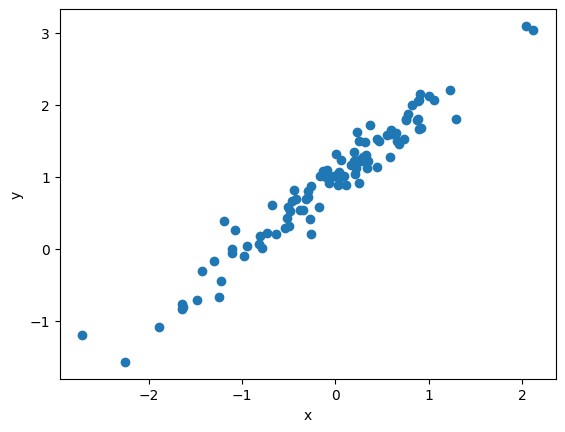

In [5]:
### SOLUTION
# Create a quick scatter plot of the data that we just generated
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Our goal is to find the optimal (RSS-minimizing) set of parameters of the intercept ($\beta_0$) and slope ($\beta_1$) for the regression function. Let's first calculate the closed-form solution using OLS. This will serve as our benchmark when we compare it to the solution found by gradient descent. Under the Gauss–Markov assumptions, OLS is BLUE (Best Linear Unbiased Estimator), meaning it has the smallest variance among all linear and unbiased estimators. In that sense, it represents the best solution we can achieve within this class of estimators.

In [3]:
# OLS solution
X = np.column_stack([np.ones(n), x])
b0_hat, b1_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)

Let's now continue with gradient descent. Unlike OLS, which gives us the closed-form solution directly, gradient descent iteratively searches for the optimal parameters by following the direction of the steepest descent of the loss function. Starting from initial guesses for $\beta_0$ and $\beta_1$, we repeatedly update the model parameters using the gradients until we (hopefully) get close to the OLS benchmark.

In [7]:
### TASK
# Gradient Descent

# Define the number of gradient descent steps and the learning rate
steps, lr = 25, 0.25

# Define starting values
b0, b1 = 0.0, 0.0

# Set up a list to store the full trajectory
path = [(b0, b1)]

# Function to calculate MSE during gradient descent steps for our example
def loss(b0, b1):
    y_hat = b0 + b1 * x
    return np.mean((y_hat - y) ** 2)

# List to store losses
losses = [loss(b0, b1)]

# Loop over the number of gradient descent steps
for _ in range(steps):
    
    # Calculate the current prediction
    y_hat = b0 + b1 * x
    
    # Calculate the gradient for beta0
    g0 = np.mean(y_hat - y)

    # TODO: Calculate the gradient for beta1
    g1 = np.zeros(n)
    
    # TODO: Update the parameter estimates
    b0 -= 0
    b1 -= 0

    # Store the results to the full trajectory
    path.append((b0, b1))

    # Store current MSE
    losses.append(loss(b0, b1))

# Turn the paths into a numpy array
path = np.array(path)
losses = np.array(losses)

In [4]:
### SOLUTION
# Gradient Descent

# Define the number of gradient descent steps and the learning rate
steps, lr = 25, 0.25

# Define starting values
b0, b1 = 0.0, 0.0

# Set up a list to store the full trajectory
path = [(b0, b1)]

# Function to calculate MSE during gradient descent steps for our example
def loss(b0, b1):
    y_hat = b0 + b1 * x
    return np.mean((y_hat - y) ** 2)

# List to store losses
losses = [loss(b0, b1)]

# Loop over the number of gradient descent steps
for _ in range(steps):
    
    # Calculate the current prediction
    y_hat = b0 + b1 * x
    
    # Calculate the gradient for beta0
    g0 = np.mean(y_hat - y)

    # Calculate the gradient for beta1
    g1 = np.mean(x * (y_hat - y))
    
    # Update the parameter estimates
    b0 -= lr * g0
    b1 -= lr * g1

    # Store the results to the full trajectory
    path.append((b0, b1))

    # Store current MSE
    losses.append(loss(b0, b1))

# Turn the paths into a numpy array
path = np.array(path)
losses = np.array(losses)

**TASK**: Try to figure out how the visualization code below roughly works and analyze the resulting plot.

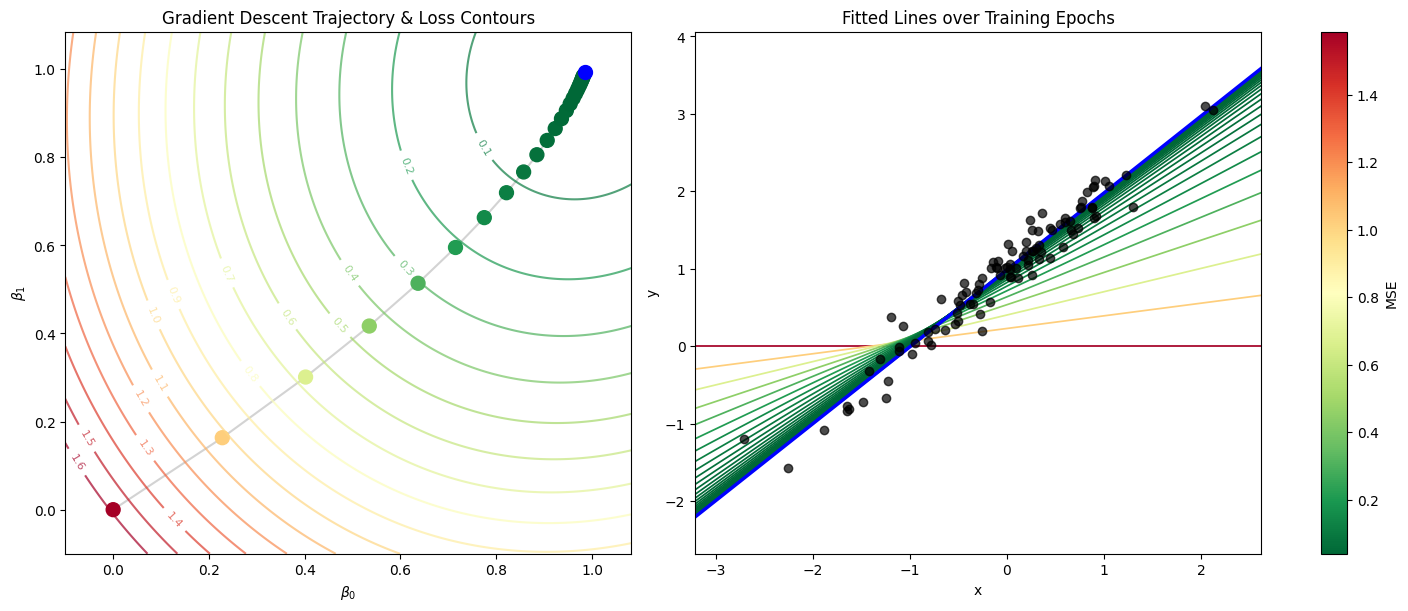

In [5]:
## Plotting

# Setup up color scheme
cmap = plt.cm.RdYlGn_r
vmin, vmax = losses.min(), losses.max()
norm = Normalize(vmin=vmin, vmax=vmax)
levels = np.arange(0.1, np.round(vmax, 1) + 0.1, 0.1)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Left plot: trajectory in parameter space with contour lines
ax0 = axes[0]

# Restrict contour grid to region visited
pad = 0.1
b0_min, b0_max = path[:,0].min() - pad, path[:,0].max() + pad
b1_min, b1_max = path[:,1].min() - pad, path[:,1].max() + pad
b0_vals = np.linspace(b0_min, b0_max, 200)
b1_vals = np.linspace(b1_min, b1_max, 200)
B0, B1 = np.meshgrid(b0_vals, b1_vals)

# Loss grid
Z = np.empty_like(B0)
for i, b1_i in enumerate(b1_vals):
    for j, b0_j in enumerate(b0_vals):
        Z[i, j] = loss(b0_j, b1_i)

# Contour lines
contours = ax0.contour(B0, B1, Z, levels=levels, cmap=cmap, norm=norm, alpha=0.7)
ax0.clabel(contours, inline=True, fontsize=8)

# Gradient descent path
ax0.plot(path[:, 0], path[:, 1], color='lightgray', zorder=0)
ax0.scatter(path[:, 0], path[:, 1], c=losses, s=100, cmap=cmap, norm=norm)
ax0.scatter([b0_hat], [b1_hat], s=100, color='blue', label='OLS optimum')
ax0.set_xlabel(r"$\beta_0$")
ax0.set_ylabel(r"$\beta_1$")
ax0.set_title("Gradient Descent Trajectory & Loss Contours")

# Right plot: fitted lines
ax1 = axes[1]
ax1.scatter(x, y, label="data", zorder=3, color="black", alpha=0.7)
xs = np.linspace(x.min() - 0.5, x.max() + 0.5, 300)
Y_all = np.vstack([b0 + b1 * xs for b0, b1 in path])
y_pad = 0.5
ax1.set_xlim(xs.min(), xs.max())
ax1.set_ylim(min(y.min(), Y_all.min()) - y_pad, max(y.max(), Y_all.max()) + y_pad)

for i, (b0_i, b1_i) in enumerate(path):
    lw = 2.5 if i == steps else 1.25
    ax1.plot(xs, b0_i + b1_i * xs, color=cmap(norm(losses[i])), linewidth=lw)

# Add OLS fit in blue
ax1.plot(xs, b0_hat + b1_hat * xs, color='blue', linewidth=2.5, label="OLS fit")
ax1.set_title("Fitted Lines over Training Epochs")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

# Shared colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label="MSE")
plt.show()

**SOLUTION:**

- Left panel: Parameter space with loss contours.
  The axes are the coefficients $\beta_0$ (intercept) and $\beta_1$ (slope). The contour lines are level sets of the mean-squared error (MSE): moving toward the center lowers the loss. The grey lines are the gradient descent lines through parameter space, starting from the initial guess $(\beta_0,\beta_1)=(0,0)$.  

- Right panel: Fitted lines over epochs.  
  The scatter shows the data $(x,y)$. Each thin line is the model prediction $\hat y = \beta_0 + \beta_1 x$ at a particular gradient-descent step. The blue line is the OLS fit, which represents the best (minimum-MSE) line. 

- Takeaway: 
  The plot links where you are in parameter space (left) to how the fitted line looks (right), using a common MSE color scale. Gradient descent iteratively moves parameters downhill on the contour map, and you see the corresponding fitted line approach the OLS benchmark.


### From OLS to Neural Networks

In OLS we have a closed-form solution because the *loss is quadratic*, the *model is linear in parameters*, and there is *no nestedness* in the function we fit.

What if we have a non-quadratic loss? For instance, consider *logistic regression*. Here we have a binary cross-entropy loss in combination with a 0-hidden layer neural network. While still being linear in parameters, this cannot be solved in closed form anymore.  

Other reasons why optimization may be necessary are:  
- constraints or regularizers (like L1, L2 norm)  
- being non-linear in parameters  

All of these require us to use an optimization algorithm like gradient descent.

This is exactly the case for neural networks where parameters sit inside nonlinear activations and multiply across layers. The objective is nonconvex, which requires iterative optimization. What is more, the model is nested. This nestedness makes us use the chain rule. Remember that if $z = f(y)$ and $y = g(x)$, then

$$
\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx}.
$$

Backpropagation is just an application of this chain rule.

Takeaway: Nonlinearity and nestedness  
- Nonlinearity (in parameters or in the loss) removes closed forms → we need iterative methods like **gradient descent**.  
- Nestedness (compositions of layers) requires the reverse-mode chain rule to get gradients efficiently → **backpropagation**.

## 7.2 Training Neural Networks

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import beta

# Reproducibility
SEED = 1
rng = np.random.default_rng(SEED)

Consider the following use case: We want to analyze how AI changes the economy.  
We have set up an economic model and used it to simulate possible outcomes for a representative firm.  
As a first step, we generate data that could have been obtained in such an experiment.

We assume a Cobb–Douglas production function:

$$
Y = f(K, L) = A \cdot K^{\alpha} \cdot L^{\, (1 - \alpha)},
$$

where $A \sim \text{Beta}(a, b)$ and $K, L \in [0, 1]$ such that $Y \in [0, 1]$.

Our goal is to fit a functional form in order to estimate $\alpha$.

In [2]:
# Number of observations
n = 1000  

# Ground truth Cobb–Douglas parameter (capital share)
alpha = 0.7  
# Note: A very high alpha indicates that capital becomes much more valuable than labor. A scenario consistent with the rise of AGI.

# Source of randomness
# Productivity factor A is drawn from a Beta(8, 2) distribution.
# Its mean is E[A] = a / (a + b) = 0.8.
a, b = 8.0, 2.0

# Inputs: capital and labor
# Capital (K) and labor (L) endowments are sampled uniformly on [0, 1].
K = rng.uniform(low=0, high=1.0, size=n)
L = rng.uniform(low=0, high=1.0, size=n)

# Stack regressors into a single matrix X = [K, L].
X = np.column_stack([K, L]) 

# Productivity shocks
# One independent draw A_i ~ Beta(8, 2) per observation.
A = rng.beta(a, b, size=n)

# Output of the representative firm
# Cobb–Douglas production function:
# Y_i = A_i * K_i^alpha * L_i^(1 - alpha)
Y = (A * (K**alpha) * (L**(1.0 - alpha)))[:, None]


Now, let's visualize the data that we have just created!

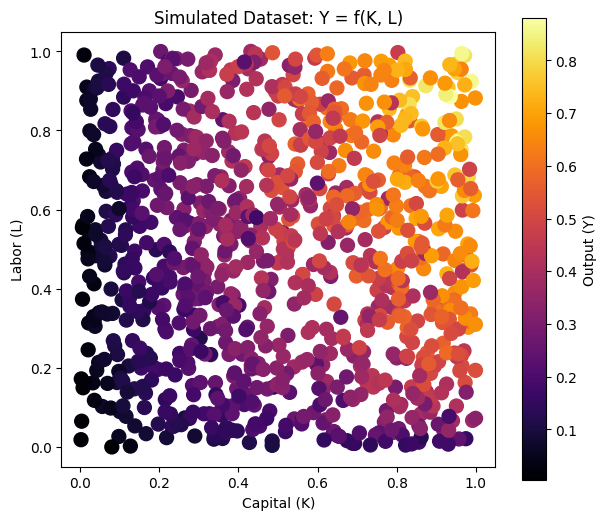

In [3]:
# Visualization
# Scatter plot of (K, L) with output Y as color intensity.
plt.figure(figsize=(7, 6))
sc = plt.scatter(K, L, c=Y, cmap="inferno", s=100)
plt.colorbar(sc, label="Output (Y)")
plt.xlabel("Capital (K)")
plt.ylabel("Labor (L)")
plt.title("Simulated Dataset: Y = f(K, L)")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

### - *Before proceeding please read the supplied PDF file carefully. This will ensure you are well-prepared for the implementation of the neural network training routine.* - 

As described in the pdf file, we will use a shallow neural network with a ReLU hidden layer activation and a Sigmoid output activation function. Let's first define those functions and their derivatives which we will need for the forward and backward pass, respectively.

In [13]:
### TASK
# TODO: Define the ReLU function and its derivative
def ReLU(x): 
    return np.zeros_like(x)
def ReLU_deriv(x): 
    return np.zeros_like(x)

# TODO: Define the Sigmoid function and its derivative
def sigmoid(x): 
    return np.zeros_like(x)
def sigmoid_deriv(x): 
    return np.zeros_like(x)

In [4]:
### SOLUTION
# ReLU
def ReLU(x): 
    return np.maximum(0, x)
def ReLU_deriv(x): 
    return (x > 0).astype(x.dtype)

# Sigmoid
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): 
    s = sigmoid(x)
    return s * (1 - s)

What we also have to define is the loss function (and its derivative). As we are in a regression problem, we can safely use the MSE as a loss function.

In [5]:
# Define (halved) MSE loss and its derivative
def loss(yhat, y): 
    return 0.5 * (yhat - y)**2
def loss_deriv(yhat, y): 
    return yhat - y

Next, we have to initialize the weight and bias matrices/vectors using an appropriate initialization scheme. We will go for He initialization here.

In [6]:
# Determine the input, output and hidden layer dimensions (use 3 hidden neurons)
n_input, n_hidden, n_output = X.shape[1], 3, Y.shape[1]

# Initialize weights and biases of the network (He initialization)
W1 = rng.normal(0, np.sqrt(2 / n_input), size=(n_hidden, n_input))
b1 = np.zeros((n_hidden, 1))
W2 = rng.normal(0, np.sqrt(2 / n_hidden), size=(n_output, n_hidden))
b2 = np.zeros((n_output, 1))

These initial weights are uninformative and must be adjusted so that they become useful.  
This is achieved through forward passes followed by iterative updates via backpropagation,  
where the weights are nudged in the direction of the steepest descent of the loss function.  

Let's implement this now! Note that we will implement stochastic gradient descent (using one observation at a time).

In [7]:
# Define hyperparameters
lr = 0.01       # learning rate
epochs = 1000   # number of training epochs

### Training a neural network using stochastic gradient descent

In [18]:
### TASK

# Loop over the training epochs
for epoch in range(1, epochs+1):
    
    # Randomly shuffle the observations in an epoch
    for i in rng.permutation(X.shape[0]):
        
        # Select the current observation
        x = X[i, :, None]
        y = Y[i]

        ## Forward Pass
        # TODO: Compute hidden layer pre-activation
        f0 = np.zeros_like(b1)
        # TODO: Compute hidden layer
        h1 = np.zeros_like(f0)
        # TODO: Compute output layer pre-activation
        f1 = np.zeros_like(b2)
        # TODO: Compute output layer (prediction)
        yhat = np.zeros_like(f1)

        ## Backpropagation
        # Start Backpropagation at the last layer
        dl_dyhat = 0 # TODO
        dyhat_df1 = sigmoid_deriv(f1)
        dl_df1 = dyhat_df1 * dl_dyhat

        # TODO: Compute layer-2 parameter gradients (remember: f1 = W2 h1 + b2)
        dl_dW2 = np.zeros_like(W2)
        dl_db2 = np.zeros_like(b2)

        # TODO: Backprop to hidden pre-activation f0
        dl_dh1  = np.zeros_like(h1)
        dh1_df0 = np.zeros_like(f0)
        dl_df0 = dh1_df0 * dl_dh1

        # TODO: Compute layer-2 parameter gradients
        dl_dW1 = np.zeros_like(W1)
        dl_db1 = np.zeros_like(b1)

        ## Gradient Descent Update
        W2 -= lr * dl_dW2;  b2 -= lr * dl_db2
        W1 -= lr * dl_dW1;  b1 -= lr * dl_db1

    if epoch % 100 == 0:
        print(f"Progress: {epoch/epochs*100:.0f}%")

Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%
Progress: 100%


In [8]:
### SOLUTION

# Loop over the training epochs
for epoch in range(1, epochs+1):
    
    # Randomly shuffle the observations in an epoch
    for i in rng.permutation(X.shape[0]):
        
        # Select the current observation
        x = X[i, :, None]
        y = Y[i]

        ## Forward Pass
        # Compute hidden layer pre-activation
        f0 = W1 @ x + b1
        # Compute hidden layer
        h1 = ReLU(f0)
        # Compute output layer pre-activation
        f1 = W2 @ h1 + b2
        # Compute output layer (prediction)
        yhat = sigmoid(f1)

        ## Backpropagation
        # Start Backpropagation at the last layer
        dl_dyhat = loss_deriv(yhat, y)
        dyhat_df1 = sigmoid_deriv(f1)
        dl_df1 = dyhat_df1 * dl_dyhat

        # Compute layer-2 parameter gradients (remember: f1 = W2 h1 + b2)
        dl_dW2 = dl_df1 @ h1.T
        dl_db2 = dl_df1

        # Backprop to hidden pre-activation f0
        dl_dh1  = W2.T @ dl_df1
        dh1_df0 = ReLU_deriv(f0)
        dl_df0 = dh1_df0 * dl_dh1

        # Compute layer-2 parameter gradients
        dl_dW1 = dl_df0 @ x.T
        dl_db1 = dl_df0

        # === Gradient Descent Update ===
        W2 -= lr * dl_dW2;  b2 -= lr * dl_db2
        W1 -= lr * dl_dW1;  b1 -= lr * dl_db1

    if epoch % 100 == 0:
        print(f"Progress: {epoch/epochs*100:.0f}%")

Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%
Progress: 100%


Now the weights are actually informative and we could use them to make predictions.

**TASK**: Why do you think the Sigmoid activation function is actually not optimal in this setting?

**SOLUTION**:
Economic theory suggests concavity:
- A well-behaved production function is concave in inputs: marginal products are diminishing as you add more capital or labor.
- The Sigmoid activation does not guarantee global concavity. Its curvature switches sign (convex for negative input, concave for positive input).

**TASK**: Consider a much simpler function which would have done a better job at approximating the true underlying functional form.

**SOLUTION**:
Simpler Alternative: log–log Model

The true data-generating process (DGP) is a Cobb–Douglas production function:

$$
Y = A \, K^{\alpha} L^{1-\alpha}.
$$


1. Log–log transformation

Taking logs on both sides gives:

$$
\ln Y = \ln A + \alpha \ln K + (1-\alpha)\ln L.
$$

- This transformation linearizes the multiplicative power form.  
- The relationship between $\ln Y$ and $(\ln K, \ln L)$ is linear.


2. Simpler model

A much simpler model can be estimated with OLS:

$$
\ln Y_i = \beta_0 + \beta_K \ln K_i + \beta_L \ln L_i + \varepsilon_i,
$$

with  
- $\beta_K \approx \alpha$  
- $\beta_L \approx 1 - \alpha$.


3. Why is this better?

- Concavity guaranteed: Cobb–Douglas is concave in $K, L$ when $\alpha \in (0,1)$.  
- No risk of non-concave behavior: Unlike a sigmoid NN, the log–log specification matches economic theory.  
- Interpretability: Coefficients directly measure elasticities of output w.r.t. inputs.  
- Parsimony: Only 2 regressors and a constant are needed, instead of hidden layers/weights.


**Conclusion:**  
In this setting, a log–log linear regression would likely outperform the Sigmoid NN for both theoretical alignment (concavity, monotonicity, diminishing returns) and empirical accuracy, because the true functional form is already log-linear.



**Important takeaway:** Always leverage prior knowledge in machine learning.  
- If you are working with an **obviously concave function**, do not blindly use a **Sigmoid output activation**, which is convex over half its range.  
- When modeling a **production function**, consider a simple **log–log model** rather than a complex neural network.  
- Remember: there is no *one-size-fits-all*. Modeling choices must be made carefully and justified based on both theory and data.